# Environment Setup

This problem illustrates some of the features that torchvision offers for
visualizing images, object detection, and bounding boxes.


In [ ]:
# download images
!gdown 1sD-GZT-sjvuECRvybmWmRFijJBnjJpiX
!gdown 1joHIvRwtqf7yN3lVHJ97ApDB_CW3OkLn
!gdown 1FW7ibhj_DObnxTxCaoLpKqqNx2gy1Frd

Downloading...
From: https://drive.google.com/uc?id=1sD-GZT-sjvuECRvybmWmRFijJBnjJpiX
To: /content/dog_park.jpeg
100% 92.5k/92.5k [00:00<00:00, 4.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=1joHIvRwtqf7yN3lVHJ97ApDB_CW3OkLn
To: /content/cars.jpg
100% 64.0k/64.0k [00:00<00:00, 5.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FW7ibhj_DObnxTxCaoLpKqqNx2gy1Frd
To: /content/airport.jpeg
100% 54.2k/54.2k [00:00<00:00, 66.9MB/s]


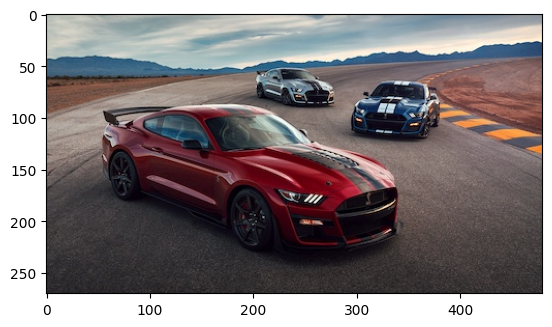

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
%matplotlib inline

def show(img):
    img = img.detach()
    img = F.to_pil_image(img)
    plt.imshow(np.asarray(img))

######################### Choose an Image #########################
# image = read_image(str('airport.jpeg'))
image = read_image(str('cars.jpg'))
# image = read_image(str('dog_park.jpeg'))
###################################################################

show(image)

# Using the model to detect objects
In this problem we will plot bounding boxes produced by torchvision detection
models.  Here we will a ResNet model loaded from
`fcos_resnet50_fpn()` model.






In the following block, you will perform model inference on the image read out from the file. The final `outputs` variable should be a **single** dictionary containing three keys: `boxes`, `scores`, and `labels`.

Hints:

1. See [`fcos_resnet50_fpn`](https://pytorch.org/vision/0.16/models/generated/torchvision.models.detection.fcos_resnet50_fpn.html#torchvision.models.detection.fcos_resnet50_fpn) for how to construct the model
2. Most neural networks are configured to take in batched inputs, but you are only given one image, how to extend the extra batch dimension?
3. The raw image contains RGB pixel values ranging from 0 to 255. These need to be normalized by 255 before feeding into the model.
4. The output is also batched, so you need to slice out the batch dimension.

In [ ]:
from torchvision.models.detection import fcos_resnet50_fpn, FCOS_ResNet50_FPN_Weights

weights = FCOS_ResNet50_FPN_Weights.DEFAULT
########## Code starts here ##########

########## Code ends here ############

# print the outputs of the model
print(outputs)

NameError: ignored

In [ ]:
categories = [weights.meta['categories'][i] for i in outputs['labels']]
print(categories)

In [ ]:
labels = [categories[j] + f" [p = {outputs['scores'][j]}]" for j in range(len(categories))]
labels

In [ ]:
sc = outputs['scores']
print(sc)
sc[sc >= 0.6]

In [ ]:
outputs['labels'][4]

# Visualizing the detected bounding boxes

Let's visualize the detection results. Implement the following `draw_result` function. The return value of this function is another image with all the visualization drawn on top of the original image. Here are the visualization requirements:

1. Draw out all bounding boxes specified in the `boxes` argument.
2. For each bounding box, add a label description indicating the class and confidence score (e.g. `person [p=0.8]`, or `dog [p=0.94]`).

Hints:

1. This function is small, the solution is 3 lines, and you don't need more than 6.
2. See documentation for [`draw_bounding_boxes`](https://pytorch.org/vision/0.16/generated/torchvision.utils.draw_bounding_boxes.html#torchvision.utils.draw_bounding_boxes).
3. Fully understand what the detection outputs (`boxes`, `labels`, and `scores`) are.
4. The map from label index to class description is in `weights.meta['categories']`. Print it out to see what it is and how to use it.
5. Python formatted string could be helpful for constructing the label description string.



In [ ]:
def draw_result(img, boxes, labels, scores):
    """
    draw bounding box visualization on top of the raw image
    """
    ########## Code starts here ##########

    ########## Code ends here ##########

Let's try to draw out all the predicted boxes. This is going to look quite messy.


In [ ]:
show(draw_result(image, outputs["boxes"], outputs["labels"], outputs["scores"]))

Note that from the printout early (and the messy visualization above), many detections have low confidence scores. In the next block, we will try to filter out boxes below certain score threshold.

Note: **Do not use for loops.** Do the thresholding in a vectorized way.

Hint:

1. Construct `img_viz` using the `draw_result` function you wrote earlier.
2. Only draw the boxes that have a score greater than the given threshold.
3. `numpy` / `pytorch` tensors can be indexed by binary masks.


In [ ]:
# Threshold by scores
score_threshold = 0.6

########## Code starts here ##########

########## Code ends here ############

# Display image with the bounding boxes using show()
show(img_viz)